## Import Libraries and ML Models 

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from matplotlib.ticker import FuncFormatter


### Data Collection 

In [5]:
df = pd.read_csv('colorado_motor_vehicle_sales.csv')
df

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000
...,...,...,...,...
496,2015,4,Larimer,244327000
497,2015,4,Mesa,88202000
498,2015,4,Pueblo,94606000
499,2015,4,Rest of State,157059000


### Data Prepration 

In [6]:
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [7]:
df.tail()

,year,quarter,county,sales
496,2015,4,Larimer,244327000
497,2015,4,Mesa,88202000
498,2015,4,Pueblo,94606000
499,2015,4,Rest of State,157059000
500,2015,4,Weld,192583000


In [8]:
df.shape

(501, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [10]:
# checking Unique values 
df.nunique()

year         8
quarter      4
county      17
sales      492
dtype: int64

### Exploratory Data Analysis (EDA) and Statistical Analysis

In [11]:
df.describe()

,year,quarter,sales
count,501.000000,501.000000,5.010000e+02
mean,2011.570858,2.502994,1.760585e+08
std,2.266599,1.120041,1.642055e+08
min,2008.000000,1.000000,6.274000e+06
25%,2010.000000,2.000000,6.148200e+07
50%,2012.000000,3.000000,1.385820e+08
75%,2014.000000,4.000000,2.241580e+08
max,2015.000000,4.000000,9.169100e+08


##### Create aggregate table for counties

In [12]:
aggregate_table = df.groupby('county').agg({
    'sales': ['count', 'mean', 'std', 'min', 'max', 'sum']
}).round(2)

aggregate_table.columns = ['Count', 'Mean Sales', 'Std Dev', 'Min Sales', 'Max Sales', 'Total Sales']

for col in ['Mean Sales', 'Min Sales', 'Max Sales', 'Total Sales']:
    aggregate_table[col] = aggregate_table[col].apply(lambda x: f"${x/1e6:.2f} M")

aggregate_table = aggregate_table.sort_values('Count', ascending=False)
aggregate_table

,Count,Mean Sales,Std Dev,Min Sales,Max Sales,Total Sales
county,,,,,,
Adams,32,$278.19 M,8.217812e+07,$147.15 M,$410.53 M,$8902.11 M
Arapahoe,32,$629.45 M,1.465202e+08,$365.06 M,$916.91 M,$20142.32 M
El Paso,32,$372.69 M,7.493149e+07,$247.02 M,$506.45 M,$11926.04 M
Douglas,32,$101.14 M,2.707156e+07,$64.46 M,$167.91 M,$3236.49 M
Denver,32,$211.36 M,3.764978e+07,$162.12 M,$320.17 M,$6763.61 M
Fremont,32,$9.90 M,1.873455e+06,$6.27 M,$13.90 M,$316.94 M
La Plata,32,$24.78 M,6.520221e+06,$13.79 M,$36.52 M,$792.81 M
Jefferson,32,$283.08 M,6.454778e+07,$181.20 M,$415.79 M,$9058.41 M
Garfield,32,$50.02 M,1.268212e+07,$31.25 M,$76.28 M,$1600.59 M


##### Categorical Coloumns 

In [13]:
categorical_data = ['year', 'quarter', 'county']
for i in categorical_data:
    print(f'Number of unique values in {i} column is {df[i].nunique()}')
    print(df[i].unique())
    print()

Number of unique values in year column is 8
[2008 2009 2010 2011 2012 2013 2014 2015]

Number of unique values in quarter column is 4
[1 2 3 4]

Number of unique values in county column is 17
['Adams' 'Arapahoe' 'Boulder/Broomfield' 'Denver' 'Douglas' 'El Paso'
 'Fremont' 'Garfield' 'Jefferson' 'La Plata' 'Larimer' 'Mesa' 'Pueblo'
 'Weld' 'Boulder' 'Broomfield' 'Rest of State']



##### Distribution of Sales

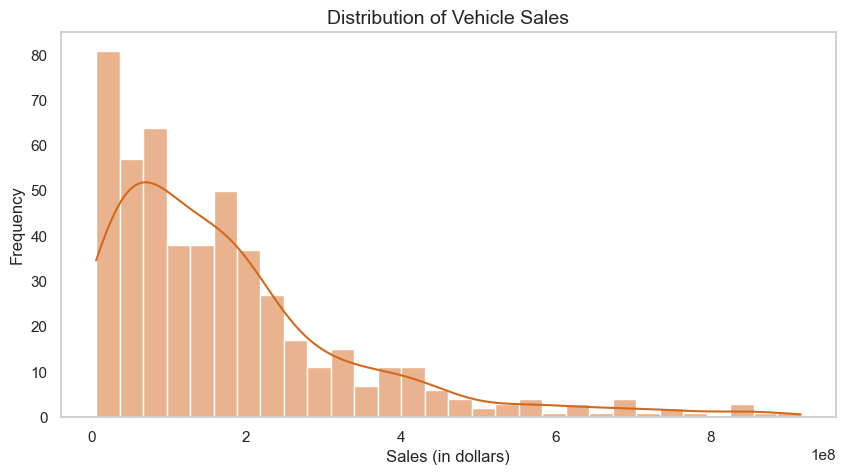

In [14]:
# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,5))
sns.histplot(df['sales'], bins=30, kde=True, color="chocolate")
plt.title("Distribution of Vehicle Sales", fontsize=14)
plt.xlabel("Sales (in dollars)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

##### Sales Trend Over Time

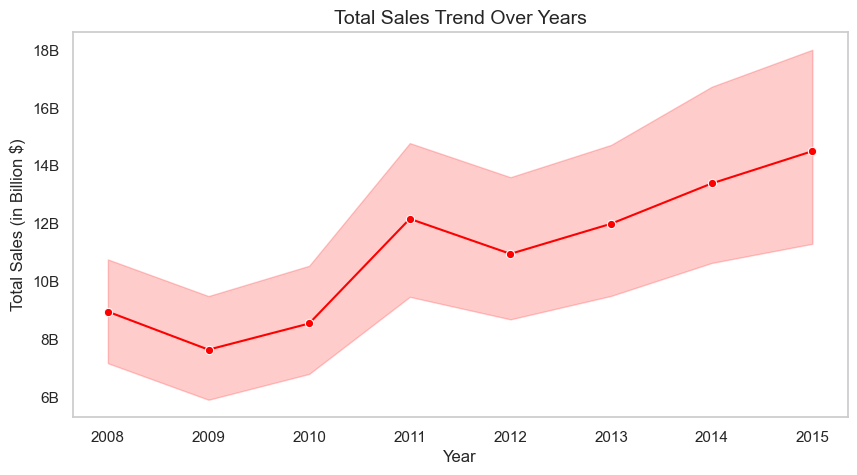

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="year", y="sales", estimator="sum", marker="o", color="red")
plt.title("Total Sales Trend Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales (in Billion $)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x / 1e9:.0f}B"))
plt.grid(False)

plt.show()

##### Total sales and Avg Sales over Quarters


In [16]:
# Aggregate table for total sales over quarters
quarterly_sales = df.groupby('quarter').agg({
    'sales': ['sum', 'mean']
}).rename(columns={'sum': 'Total Sales', 'mean': 'Avg Sales'})

quarterly_sales[('sales', 'Total Sales')] = quarterly_sales[('sales', 'Total Sales')].apply(lambda x: f"${x/1e9:.2f} B")
quarterly_sales[('sales', 'Avg Sales')] = quarterly_sales[('sales', 'Avg Sales')].apply(lambda x: f"${x/1e6:.2f} M")

quarterly_sales.columns = quarterly_sales.columns.droplevel(0)
quarterly_sales

,Total Sales,Avg Sales
quarter,,
1,$20.38 B,$163.01 M
2,$22.34 B,$178.75 M
3,$23.91 B,$191.32 M
4,$21.57 B,$171.19 M


##### Bivariate Analysis - Year vs. Sales

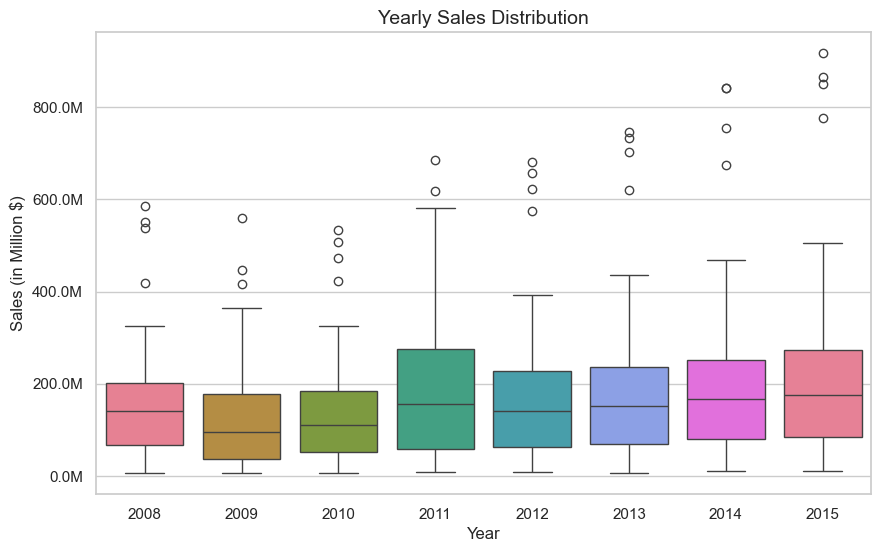

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="year", y="sales", data=df, hue="year", palette="husl")
plt.title("Yearly Sales Distribution", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sales (in Million $)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x / 1e6:.1f}M"))
plt.legend().remove()

plt.show()



##### Bivariate Analysis - Quarter vs. Sales

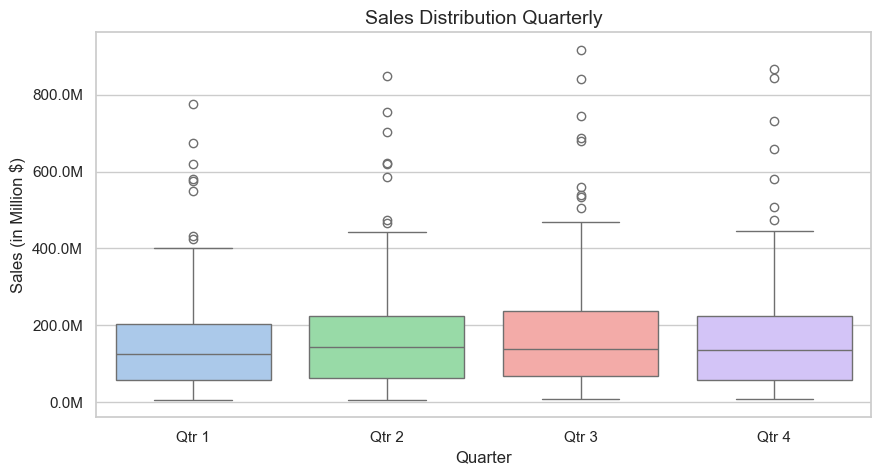

In [18]:

plt.figure(figsize=(10, 5))
sns.boxplot(x="quarter", y="sales", data=df, hue="quarter", palette="pastel6")
plt.title("Sales Distribution Quarterly", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Sales (in Million $)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Qtr 1", "Qtr 2", "Qtr 3", "Qtr 4"])  
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x / 1e6:.1f}M"))
plt.legend().remove()

plt.show()


#### OUTLIERS

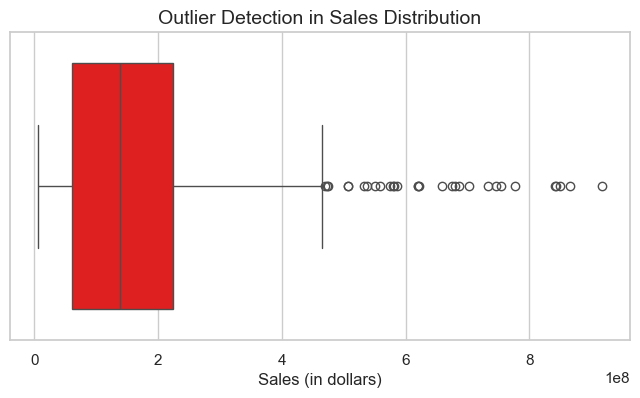

(30,
      year  quarter    county      sales
 1    2008        1  Arapahoe  550378000
 15   2008        2  Arapahoe  585224000
 29   2008        3  Arapahoe  538296000
 87   2009        3  Arapahoe  559316000
 134  2010        2  Arapahoe  473095000)

In [19]:
# Detecting Outliers using Boxplot for Sales
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["sales"], color="red")
plt.title("Outlier Detection in Sales Distribution", fontsize=14)
plt.xlabel("Sales (in dollars)")
plt.show()

# Using IQR Method to Identify Outliers
Q1 = df["sales"].quantile(0.25)
Q3 = df["sales"].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers
outliers = df[(df["sales"] < lower_bound) | (df["sales"] > upper_bound)]
num_outliers = outliers.shape[0]

num_outliers, outliers.head()


##### Checking the impact of outliers on key statistics


In [20]:
stats_with_outliers = df["sales"].describe()

df_no_outliers = df[(df["sales"] >= lower_bound) & (df["sales"] <= upper_bound)]
stats_without_outliers = df_no_outliers["sales"].describe()

# Comparing statistics before and after removing outliers
print(stats_with_outliers)
print("-----------------")
print(stats_without_outliers)


count    5.010000e+02
mean     1.760585e+08
std      1.642055e+08
min      6.274000e+06
25%      6.148200e+07
50%      1.385820e+08
75%      2.241580e+08
max      9.169100e+08
Name: sales, dtype: float64
-----------------
count    4.710000e+02
mean     1.458273e+08
std      1.111942e+08
min      6.274000e+06
25%      5.628750e+07
50%      1.232950e+08
75%      2.041745e+08
max      4.652240e+08
Name: sales, dtype: float64


In [21]:
# Creating a DataFrame to show the impact of outliers in a table format
impact_df = pd.DataFrame({
    "Statistic": ["Mean Sales", "Standard Deviation", "Maximum Sales"],
    "With Outliers": [stats_with_outliers["mean"], stats_with_outliers["std"], stats_with_outliers["max"]],
    "Without Outliers": [stats_without_outliers["mean"], stats_without_outliers["std"], stats_without_outliers["max"]],
})

# Adding a Change Percentage column
impact_df["Change (%)"] = ((impact_df["Without Outliers"] - impact_df["With Outliers"]) / impact_df["With Outliers"]) * 100

# Formatting values for readability
impact_df["With Outliers"] = impact_df["With Outliers"].apply(lambda x: f"${x/1e6:.2f}M")
impact_df["Without Outliers"] = impact_df["Without Outliers"].apply(lambda x: f"${x/1e6:.2f}M")
impact_df["Change (%)"] = impact_df["Change (%)"].apply(lambda x: f"{x:.1f}%")

# Display the table
impact_df


,Statistic,With Outliers,Without Outliers,Change (%)
0,Mean Sales,$176.06M,$145.83M,-17.2%
1,Standard Deviation,$164.21M,$111.19M,-32.3%
2,Maximum Sales,$916.91M,$465.22M,-49.3%


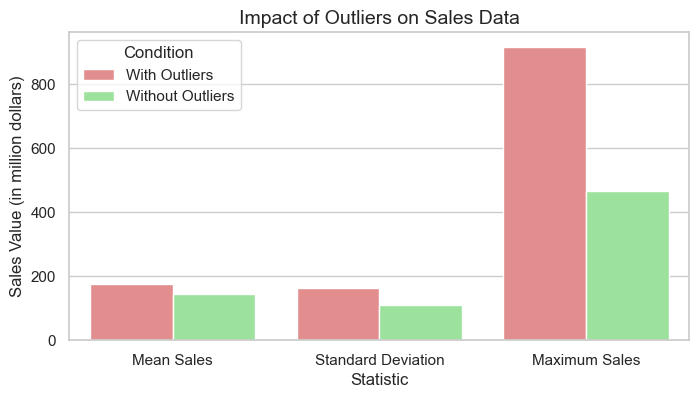

In [22]:
# Removing percentage symbol and converting to numeric
impact_df_numeric = impact_df.copy()
impact_df_numeric["Change (%)"] = impact_df_numeric["Change (%)"].str.replace("%", "").astype(float)
impact_df_numeric["With Outliers"] = impact_df_numeric["With Outliers"].str.replace("[$M]", "", regex=True).astype(float)
impact_df_numeric["Without Outliers"] = impact_df_numeric["Without Outliers"].str.replace("[$M]", "", regex=True).astype(float)

# Reshaping data for visualization, excluding "Change (%)"
impact_df_melted = pd.melt(
    impact_df_numeric,
    id_vars=["Statistic"],
    value_vars=["With Outliers", "Without Outliers"],
    var_name="Condition",
    value_name="Value"
)

# Bar plot to visualize impact of outliers
plt.figure(figsize=(8, 4))
sns.barplot(x="Statistic", y="Value", hue="Condition", data=impact_df_melted, palette=["lightcoral", "lightgreen"])
plt.title("Impact of Outliers on Sales Data", fontsize=14)
plt.ylabel("Sales Value (in million dollars)")
plt.xlabel("Statistic")
plt.show()


### Country wise Analysis 

In [23]:
top_counties = df.groupby("county")["sales"].sum().sort_values(ascending=False).head(10)

##### 1. Bar Chart for Total Sales by County (Top 10)


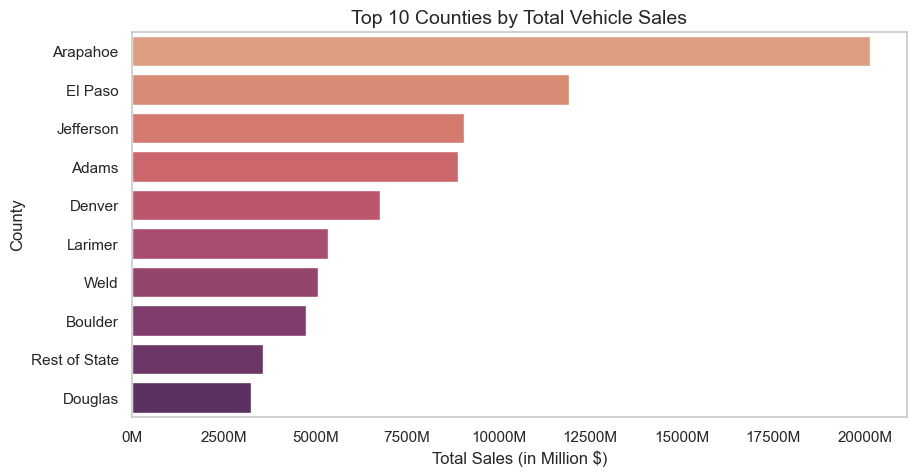

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_counties.values / 1e6, y=top_counties.index, hue=top_counties.index, dodge=False, palette="flare")
plt.title("Top 10 Counties by Total Vehicle Sales", fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}M"))
plt.xlabel("Total Sales (in Million $)")
plt.ylabel("County")
plt.grid(False)
plt.show()



##### 2. Yearly Sales Trends for Top 5 Counties


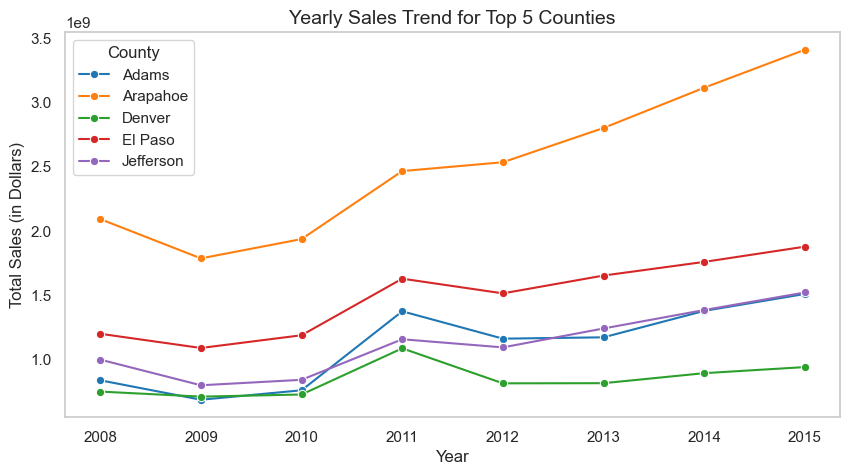

In [25]:
top_5_counties = top_counties.head(5).index
df_top_5 = df[df["county"].isin(top_5_counties)]
yearly_sales_top_5 = df_top_5.groupby(["year", "county"])["sales"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_sales_top_5, x="year", y="sales", hue="county", marker="o", palette="tab10")
plt.title("Yearly Sales Trend for Top 5 Counties", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales (in Dollars)")
plt.legend(title="County")
plt.grid(False)
plt.show()



##### 3. Quarterly Sales Trends for Top 5 Counties 


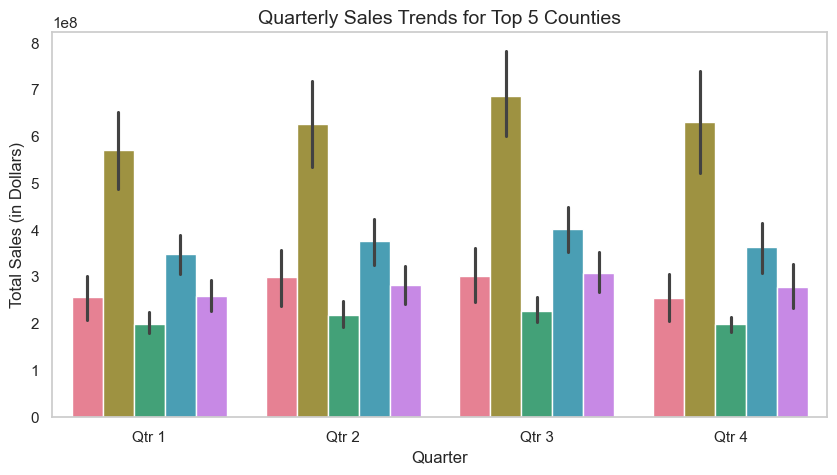

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x="quarter", y="sales", hue="county", data=df_top_5, palette="husl")
plt.title("Quarterly Sales Trends for Top 5 Counties", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Total Sales (in Dollars)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Qtr 1", "Qtr 2", "Qtr 3", "Qtr 4"])  
plt.grid(False)
plt.legend(title="County").remove()

plt.show()

### Correlation 

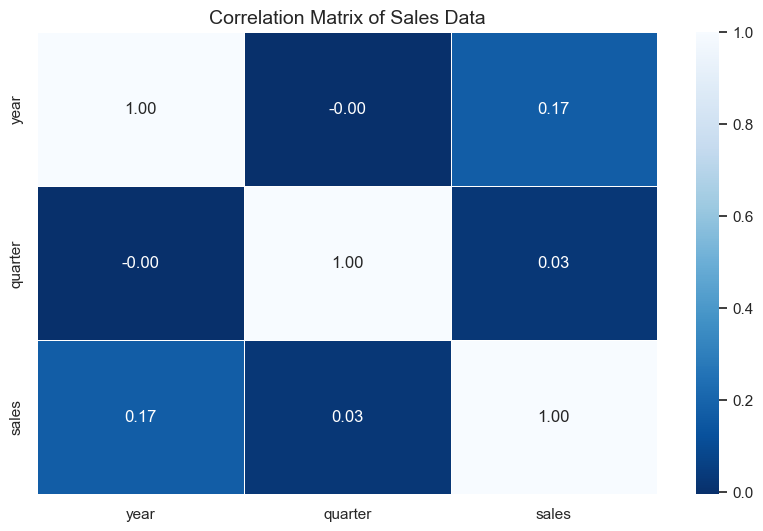

sales      1.000000
year       0.172257
quarter    0.025140
Name: sales, dtype: float64

In [27]:
numerical_df = df.select_dtypes(include=["number"])

if 'sales' in numerical_df.columns:
    numerical_df["sales"] = pd.to_numeric(numerical_df["sales"], errors="coerce")

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sales Data", fontsize=14)
plt.show()

correlation_with_sales = correlation_matrix["sales"].sort_values(ascending=False)
correlation_with_sales


# Predict Modeling 

## Xboost model

In [28]:
df_encoded = pd.get_dummies(df, columns=["county"], drop_first=True) # one-hot encoding of county column

# Creating lag features (previous quarter's sales as a predictor)
df_encoded["sales_lag_1"] = df_encoded["sales"].shift(1).fillna(df_encoded["sales"].mean())

##### Define features (X) and target (y)

In [29]:
X = df_encoded.drop(columns=["sales"])  # Features: Year, Quarter, County (one-hot), Lag Sales
y = df_encoded["sales"]  # Target variable: Sales

##### Split the dataset in train and test data 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (80% train, 20% test)

##### Initialize and train the XGBoost model and make Predictions 

In [31]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Return model evaluation metrics
mae, rmse, r2

# Creating a DataFrame to display evaluation metrics
metrics_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R-squared (R2)"],
    "Value": [f"{mae/1e6:.2f}", f"{rmse/1e6:.2f}", f"{r2:.2%}"]
})

print (mae)
print (rmse)
print (r2)

metrics_table



26161300.0
39464748.928963326
0.940839409828186


,Metric,Value
0,Mean Absolute Error (MAE),26.16
1,Root Mean Squared Error (RMSE),39.46
2,R-squared (R2),94.08%


##### Plot Grapgh of actual vs predicted sales


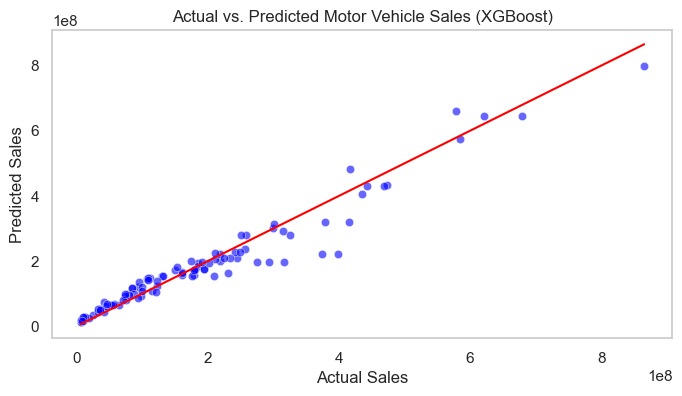

In [32]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="-", color="red")  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Motor Vehicle Sales (XGBoost)")
plt.grid(False)
plt.show()


## Random Forest model

In [33]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False) # Initialize OneHotEncoder
encoded_counties = encoder.fit_transform(df[["county"]])# One-hot encode the 'county' column
encoded_df = pd.DataFrame(encoded_counties, columns=encoder.get_feature_names_out(["county"])) 
df_encoded = pd.concat([df.drop(columns=["county"]), encoded_df], axis=1)

##### Define features (X) and target (y)

In [34]:
X = df_encoded.drop(columns=["sales"]) # Features: Year, Quarter, County (one-hot)
y = df_encoded["sales"] # Target variable: Sales

##### Split the dataset in train and test data 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (80% train, 20% test)

##### Initialize and train the Random Forest model and make Predictions 

In [36]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100,  random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

RF_metrics_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R-squared (R2)"],
    "Value": [f"{mae_rf/1e6:.2f}", f"{rmse_rf/1e6:.2f}", f"{r2_rf:.2%}"]
})

print (mae_rf)
print (rmse_rf)
print (r2_rf)

RF_metrics_table

13307096.534653466
20092472.66581034
0.9846651178222561


,Metric,Value
0,Mean Absolute Error (MAE),13.31
1,Root Mean Squared Error (RMSE),20.09
2,R-squared (R2),98.47%


##### Plot Grapgh of actual vs predicted sales


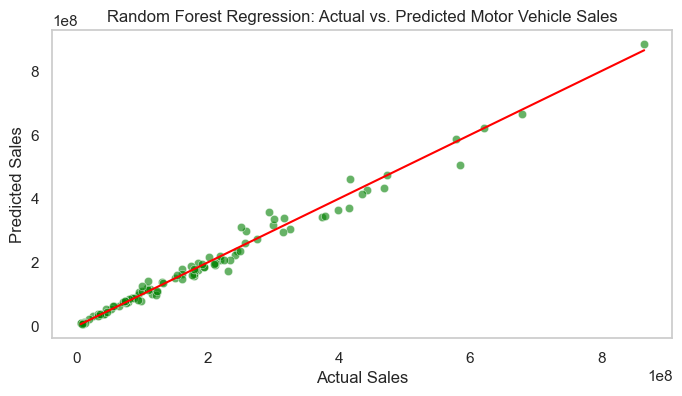

In [37]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred_rf, color="green", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="-", color="red")  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest Regression: Actual vs. Predicted Motor Vehicle Sales")
plt.grid(False)
plt.show()


### Conclusion:

- **Sales Distribution & Trends**: The sales data exhibits a **right-skewed distribution**, indicating that lower-value sales dominate while high-value sales are rare. Sales have followed an **overall increasing trend** from **2008** to **2015**, with **notable spikes** in **2011** and **2015**. However, variability in sales has increased over time, especially in later years.

- **Quarterly and County-Wise Insights**: Sales are **seasonal**, peaking in **Q3**, while **Q1 has the lowest sales**. 
**Arapahoe** County leads in total sales, significantly surpassing other counties, while **El Paso and Jefferson** Counties rank second and third, respectively.

- **Impact of Outliers**: Outliers significantly **inflate sales metrics**, affecting the mean, standard deviation, and maximum sales values. Removing outliers **improves data stability** and provides a clearer picture of sales trends.

- **Correlation & Predictive Modeling**: Sales have a **weak positive correlation (0.17)** with the year and almost **no correlation (0.03) with the quarter**, indicating that long-term growth exists but sales remain relatively stable across quarters. The prediction model is **highly accurate (R² = 94.08%)**, but errors **(MAE = 26.16, RMSE = 39.46)** suggest that further refinements are needed to enhance accuracy, especially for extreme sales values.

- **Model Performance**: Both **XGBoost and Random Forest Regression models** effectively predict motor vehicle sales, but minor deviations exist in extreme sales cases. Both models perform comparably, but additional statistical validation is required to determine the superior model.